# Fire Evacuation Planning for the MI Building

Due to the increasing amount of students at the Technical University of Munich, the fire evacuation plan
for the MI building needs to be reconsidered. An important information is the distribution of people within the
MI building p(x).<br>
In a hypothetical scenario, the fire department decided to track 100 random students and employees during
the busiest hour on different days. The idea is to use this data for learning p(x). As a first experiment, the
fire department wants to estimate the number of people that is critical for the building. To simplify the task,
it defined a sensitive area in front of the main entrance—marked by the orange rectangle (130/70 & 150/50)—
where the number of people should not exceed 100. You will get points for this task if you document the
experiments.


In [1]:
# For automatic file reloading
%load_ext autoreload
%autoreload 2
%matplotlib inline

### We import the neccessary libraries

In [2]:
import IPython
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from exercise_code.VAE import VAE
from exercise_code.sampling import Sampling
from exercise_code.task_4_utils import *

### Set all the required parameters

In [3]:
parameters = {
    "shape": (2,1),
    "output_shape": 2,
    "intermediate_layers": 64,
    "latent_dim": 2,
    "adam_learning_rate": 0.005,
    "batch_size": 64,
    "epochs": 200
}

### Build the encoder

In [36]:
# Encoder network
encoder_inputs = keras.Input(shape=parameters["shape"])
X = layers.Flatten(name="Flatten")(encoder_inputs) 
x = layers.Dense(parameters["intermediate_layers"], activation="relu")(X)
x = layers.Dense(parameters["intermediate_layers"], activation="relu")(x)
z_mean = layers.Dense(parameters["latent_dim"], name="z_mean")(x)
z_log_var = layers.Dense(parameters["latent_dim"], name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 2, 1)]       0           []                               
                                                                                                  
 Flatten (Flatten)              (None, 2)            0           ['input_13[0][0]']               
                                                                                                  
 dense_30 (Dense)               (None, 64)           192         ['Flatten[0][0]']                
                                                                                                  
 dense_31 (Dense)               (None, 64)           4160        ['dense_30[0][0]']               
                                                                                            

### Build the decoder

In [37]:
# Decoder network
latent_inputs = keras.Input(shape=(parameters["latent_dim"],))
x = layers.Dense(parameters["intermediate_layers"], activation="relu")(latent_inputs)
x = layers.Dense(parameters["intermediate_layers"], activation="relu")(x)
decoder_outputs = layers.Dense(parameters["output_shape"], activation="linear")(x)
decoder_outputs = layers.Reshape(parameters["shape"], name="Reshape")(decoder_outputs)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()     

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_32 (Dense)            (None, 64)                192       
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 2)                 130       
                                                                 
 Reshape (Reshape)           (None, 2, 1)              0         
                                                                 
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


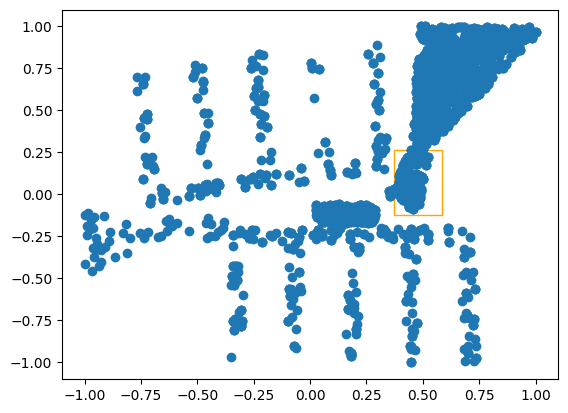

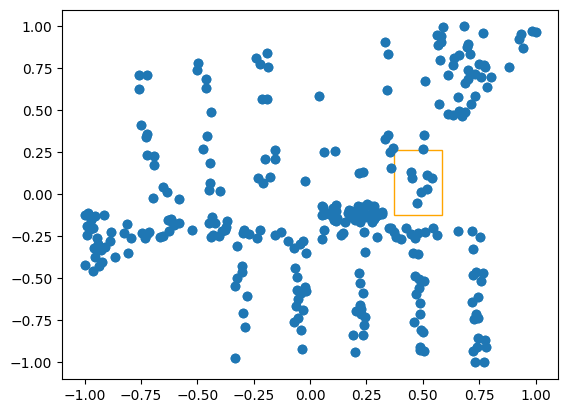

In [6]:
# Load the train dataset from the .npy file
train_set = np.load('../../FireEvac_train_set.npy')

# Load the test dataset from the .npy file
test_set = np.load('../../FireEvac_test_set.npy')

# Normalize data

# Set the normalization range. True for [-1, 1] range and False for [0, 1] range
range_mask = True
x_train, x_test = normalize_dataset(train_set, test_set, range_mask)

# Plot the train and test set
plot_dataset(x_train, x_test)

In [7]:
#### Create an instance of the VAE class
vae = VAE(encoder, decoder, scale=2*1)

# Compile and train the model
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"]))
vae.fit(x_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"])

Epoch 1/200
47/47 [==============================] - 1s 2ms/step - loss: 5.7247 - reconstruction_loss: 3.8621 - kl_loss: 0.1036
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 1.0080 - reconstruction_loss: 0.4285 - kl_loss: 0.4051
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5779 - reconstruction_loss: 0.2111 - kl_loss: 0.3818
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5526 - reconstruction_loss: 0.1347 - kl_loss: 0.3668
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 2.3799 - reconstruction_loss: 1.2472 - kl_loss: 1.8026
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 1.6879 - reconstruction_loss: -0.1608 - kl_loss: 1.3857
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7563 - reconstruction_loss: 0.3013 - kl_loss: 0.4965
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6635 - reconstruction_loss: 

47/47 [==============================] - 0s 2ms/step - loss: 0.5297 - reconstruction_loss: 0.1678 - kl_loss: 0.3453
Epoch 65/200
47/47 [==============================] - 0s 2ms/step - loss: 0.1943 - reconstruction_loss: 0.0311 - kl_loss: 0.3502
Epoch 66/200
47/47 [==============================] - 0s 2ms/step - loss: 0.4846 - reconstruction_loss: 0.0201 - kl_loss: 0.3355
Epoch 67/200
47/47 [==============================] - 0s 1ms/step - loss: 0.3658 - reconstruction_loss: -0.0027 - kl_loss: 0.3348
Epoch 68/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4707 - reconstruction_loss: 0.0796 - kl_loss: 0.4182
Epoch 69/200
47/47 [==============================] - 0s 2ms/step - loss: 0.3368 - reconstruction_loss: -0.0840 - kl_loss: 0.3916
Epoch 70/200
47/47 [==============================] - 0s 2ms/step - loss: 0.3020 - reconstruction_loss: -0.0789 - kl_loss: 0.3607
Epoch 71/200
47/47 [==============================] - 0s 2ms/step - loss: 0.3879 - reconstruction_loss: -0.

47/47 [==============================] - 0s 1ms/step - loss: 0.3260 - reconstruction_loss: -0.1475 - kl_loss: 0.4854
Epoch 128/200
47/47 [==============================] - 0s 1ms/step - loss: 0.1847 - reconstruction_loss: -0.2945 - kl_loss: 0.4664
Epoch 129/200
47/47 [==============================] - 0s 2ms/step - loss: 5.1139 - reconstruction_loss: 5.0467 - kl_loss: 1.4670
Epoch 130/200
47/47 [==============================] - 0s 2ms/step - loss: 6.5509 - reconstruction_loss: 5.5954 - kl_loss: 0.7008
Epoch 131/200
47/47 [==============================] - 0s 2ms/step - loss: 5.9780 - reconstruction_loss: 5.8112 - kl_loss: 0.2332
Epoch 132/200
47/47 [==============================] - 0s 1ms/step - loss: 5.9927 - reconstruction_loss: 5.3297 - kl_loss: 0.1511
Epoch 133/200
47/47 [==============================] - 0s 1ms/step - loss: 2.7058 - reconstruction_loss: 2.7798 - kl_loss: 0.9540
Epoch 134/200
47/47 [==============================] - 0s 2ms/step - loss: 7.9908 - reconstruction_los

47/47 [==============================] - 0s 2ms/step - loss: 5.7822 - reconstruction_loss: 5.4278 - kl_loss: 0.2310
Epoch 191/200
47/47 [==============================] - 0s 2ms/step - loss: 5.8584 - reconstruction_loss: 5.5024 - kl_loss: 0.1693
Epoch 192/200
47/47 [==============================] - 0s 2ms/step - loss: 5.5094 - reconstruction_loss: 5.4767 - kl_loss: 0.1582
Epoch 193/200
47/47 [==============================] - 0s 2ms/step - loss: 5.5227 - reconstruction_loss: 5.5189 - kl_loss: 0.1796
Epoch 194/200
47/47 [==============================] - 0s 2ms/step - loss: 6.1588 - reconstruction_loss: 5.5480 - kl_loss: 0.3422
Epoch 195/200
47/47 [==============================] - 0s 2ms/step - loss: 5.5067 - reconstruction_loss: 5.3973 - kl_loss: 0.2055
Epoch 196/200
47/47 [==============================] - 0s 2ms/step - loss: 5.6097 - reconstruction_loss: 5.4711 - kl_loss: 0.3532
Epoch 197/200
47/47 [==============================] - 0s 2ms/step - loss: 6.1002 - reconstruction_loss:

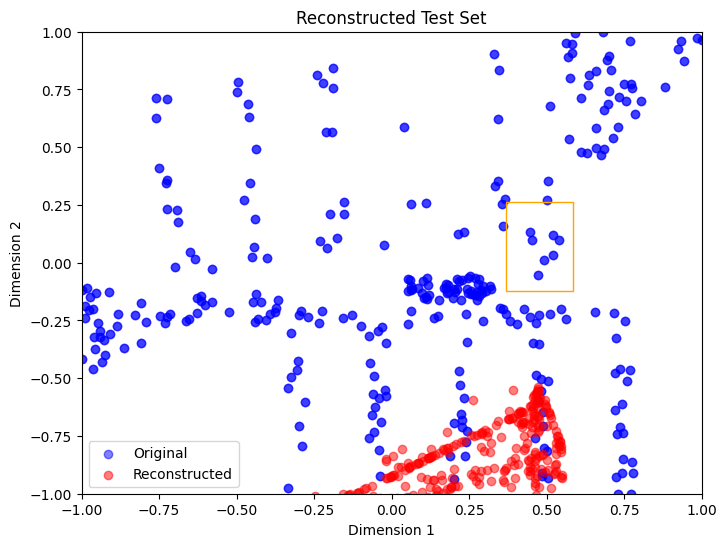

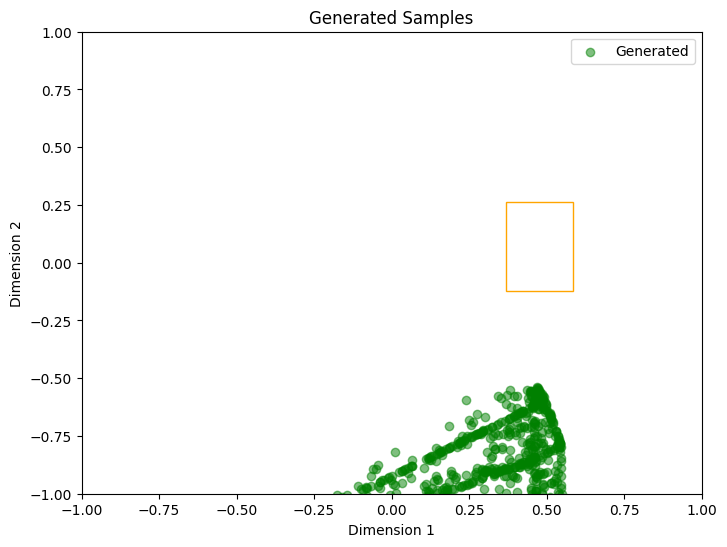

In [8]:
plot_results(vae, x_test, range_mask)

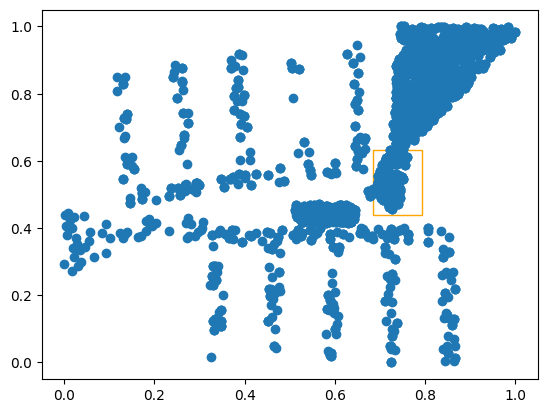

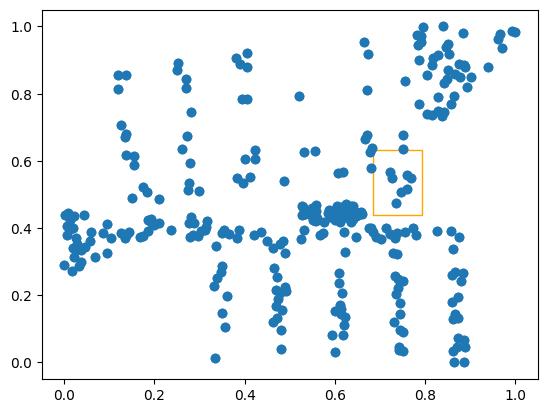

In [9]:
# Load the train dataset from the .npy file
train_set = np.load('../../FireEvac_train_set.npy')

# Load the test dataset from the .npy file
test_set = np.load('../../FireEvac_test_set.npy')

# Normalize data

# Set the normalization range. True for [-1, 1] range and False for [0, 1] range
range_mask = False
x_train, x_test = normalize_dataset(train_set, test_set, range_mask)

# Plot the train and test set
plot_dataset(x_train, x_test)

In [10]:
# Run Encoder and Decoder set up cells automatically to reset the model
IPython.display.display(IPython.display.Javascript("IPython.notebook.execute_cells([7])"))
IPython.display.display(IPython.display.Javascript("IPython.notebook.execute_cells([9])"))

#### Create an instance of the VAE class
vae = VAE(encoder, decoder, scale=2*1)

# Compile and train the model
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"]))
vae.fit(x_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/200
47/47 [==============================] - 1s 1ms/step - loss: 11.0677 - reconstruction_loss: 10.9869 - kl_loss: 0.0174
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 11.0187 - reconstruction_loss: 10.9713 - kl_loss: 0.0026
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 10.9766 - reconstruction_loss: 10.9746 - kl_loss: 0.0014
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 10.9553 - reconstruction_loss: 10.9740 - kl_loss: 7.3384e-04
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 10.9578 - reconstruction_loss: 10.9713 - kl_loss: 6.4400e-04
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 10.9659 - reconstruction_loss: 10.9721 - kl_loss: 5.7992e-04
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 10.9497 - reconstruction_loss: 10.9725 - kl_loss: 3.4876e-04
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 1

47/47 [==============================] - 0s 1ms/step - loss: 1.2449 - reconstruction_loss: 1.2459 - kl_loss: 2.6452e-04
Epoch 63/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2578 - reconstruction_loss: 1.2474 - kl_loss: 2.8624e-04
Epoch 64/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2510 - reconstruction_loss: 1.2467 - kl_loss: 2.5363e-04
Epoch 65/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2440 - reconstruction_loss: 1.2471 - kl_loss: 2.4578e-04
Epoch 66/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2557 - reconstruction_loss: 1.2486 - kl_loss: 2.5548e-04
Epoch 67/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2453 - reconstruction_loss: 1.2471 - kl_loss: 1.9921e-04
Epoch 68/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2427 - reconstruction_loss: 1.2471 - kl_loss: 1.9179e-04
Epoch 69/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2438 -

47/47 [==============================] - 0s 1ms/step - loss: 1.2486 - reconstruction_loss: 1.2464 - kl_loss: 7.7636e-05
Epoch 124/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2484 - reconstruction_loss: 1.2476 - kl_loss: 7.0334e-05
Epoch 125/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2451 - reconstruction_loss: 1.2465 - kl_loss: 3.4028e-05
Epoch 126/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2502 - reconstruction_loss: 1.2470 - kl_loss: 2.8898e-05
Epoch 127/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2427 - reconstruction_loss: 1.2468 - kl_loss: 2.9985e-05
Epoch 128/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2443 - reconstruction_loss: 1.2468 - kl_loss: 1.8198e-05
Epoch 129/200
47/47 [==============================] - 0s 2ms/step - loss: 1.2507 - reconstruction_loss: 1.2466 - kl_loss: 7.0217e-06
Epoch 130/200
47/47 [==============================] - 0s 1ms/step - loss: 1

47/47 [==============================] - 0s 1ms/step - loss: 1.2538 - reconstruction_loss: 1.2465 - kl_loss: 5.2714e-08
Epoch 185/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2367 - reconstruction_loss: 1.2465 - kl_loss: 7.6866e-08
Epoch 186/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2511 - reconstruction_loss: 1.2466 - kl_loss: 1.0371e-07
Epoch 187/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2449 - reconstruction_loss: 1.2464 - kl_loss: 1.1619e-07
Epoch 188/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2492 - reconstruction_loss: 1.2464 - kl_loss: 8.8708e-08
Epoch 189/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2351 - reconstruction_loss: 1.2467 - kl_loss: 4.3500e-08
Epoch 190/200
47/47 [==============================] - 0s 1ms/step - loss: 1.2512 - reconstruction_loss: 1.2467 - kl_loss: 7.2151e-08
Epoch 191/200
47/47 [==============================] - 0s 1ms/step - loss: 1

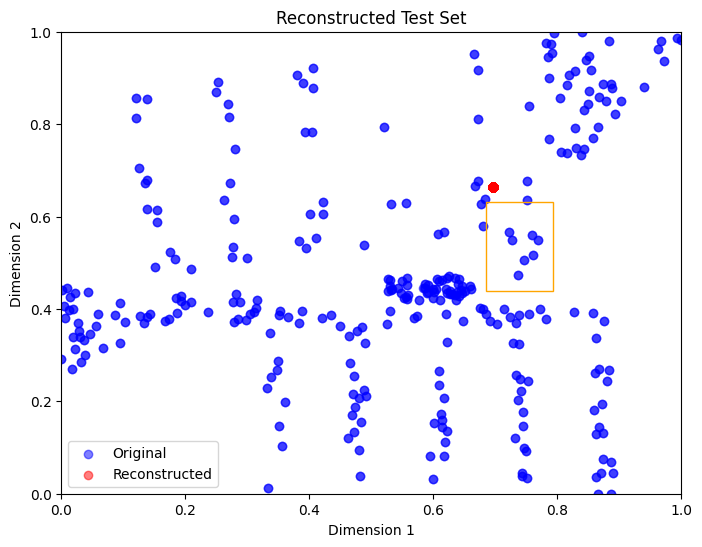

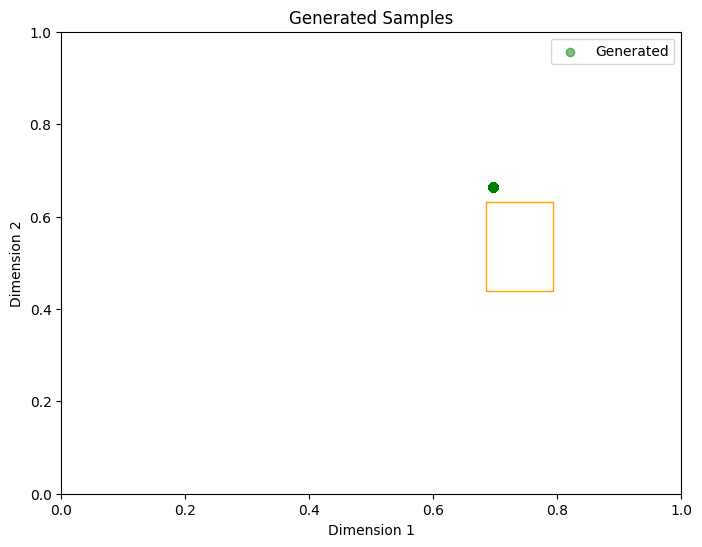

In [11]:
plot_results(vae, x_test, range_mask)

In [35]:
# Run Encoder and Decoder set up cells automatically to reset the model
IPython.display.display(IPython.display.Javascript("IPython.notebook.execute_cells([7])"))
IPython.display.display(IPython.display.Javascript("IPython.notebook.execute_cells([9])"))

#### Create an instance of the VAE class
vae = VAE(encoder, decoder, scale=2*1)

parameters["epochs"] = 2

# Compile and train the model
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=parameters["adam_learning_rate"]))
vae.fit(x_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/2
47/47 [==============================] - 1s 1ms/step - loss: 5.9042 - reconstruction_loss: 3.3276 - kl_loss: 0.0803
Epoch 2/2
47/47 [==============================] - 0s 2ms/step - loss: 1.6154 - reconstruction_loss: 1.4602 - kl_loss: 0.0258


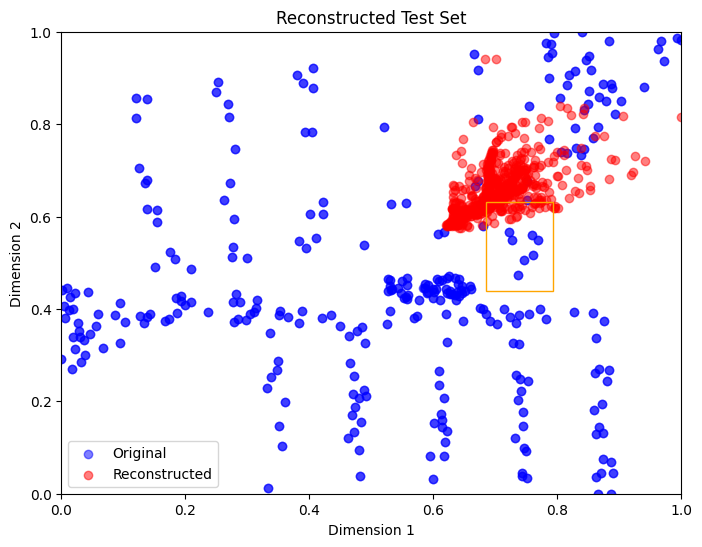

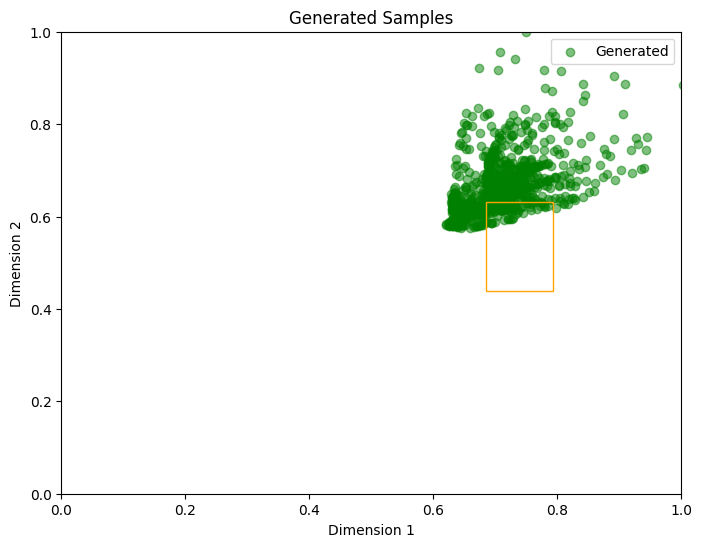

In [38]:
plot_results(vae, x_test, range_mask)

In [39]:
# Define the maximum allowed number of people in the sensitive area
max_allowed_people = 100

# Generate samples and count the number of people in the sensitive area
num_samples = 0
count_people = 0

while count_people <= max_allowed_people:
    # Generate a batch of samples from the VAE model
    z = np.random.normal(size=(1, vae.encoder.get_layer("z_mean").output_shape[-1]))
    generated_samples = vae.decoder(z).numpy().reshape(-1, 2).flatten()

    flattened_generated_samples = generated_samples.reshape(-1, 2)

    # Check if the generated samples fall within the sensitive area
    for sample in flattened_generated_samples:
        if is_inside_sensitive_area(sample):
            count_people += 1

    #    num_samples += parameters["batch_size"]
    num_samples += 1

# # Estimate the critical number of people for the MI building
# estimated_critical_number = num_samples

# print("Estimated critical number of people:", estimated_critical_number)
print("Number of batches generated:", num_samples)
print("Sample batch size:", parameters["batch_size"])

Number of batches generated: 881
Sample batch size: 64
